In [452]:
import tensorflow as tf
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pylab import rcParams

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

from functions_for_project import *

In [453]:
BF_BTCUSD = pd.read_csv('btcusd-1m-bitfinex.csv')
BN_BTCUSD = pd.read_csv('BTCUSDT-1m-binance.csv')
BM_BTCUSD = pd.read_csv('XBTUSD-1m-bitmex.csv')

In [457]:
event_time = pd.to_datetime('2019-5-09 00:00:00')
starting_date = pd.to_datetime('2018-8-09 00:00:00')
BF_BN,BN = format_both_df(BF_BTCUSD,BN_BTCUSD,event_time,starting_date)
BF_BM,BM = format_both_df(BF_BTCUSD,BM_BTCUSD,event_time,starting_date)

In [458]:
mod_BN = smf.ols(formula='swingdiff ~ minutes + after_event + after_event * minutes', data=BF_BN)
res_BN = mod_BN.fit()
BF_BN['regression_results'] = res_BN.params[0] + BF_BN['after_event'] * res_BN.params[1] + BF_BN['minutes'] * res_BN.params[2] + BF_BN['after_event'] * BF_BN['minutes'] * res_BN.params[3]
print(res_BN.summary())

mod_BM = smf.ols(formula='swingdiff ~ minutes + after_event + after_event * minutes', data=BF_BM)
res_BM = mod_BM.fit()
BF_BM['regression_results'] = res_BM.params[0] + BF_BM['after_event'] * res_BM.params[1] + BF_BM['minutes'] * res_BM.params[2] + BF_BM['after_event'] * BF_BM['minutes'] * res_BM.params[3]
print(res_BM.summary())

                            OLS Regression Results                            
Dep. Variable:              swingdiff   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                 1.297e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:11:38   Log-Likelihood:            -2.1241e+06
No. Observations:              674548   AIC:                         4.248e+06
Df Residuals:                  674544   BIC:                         4.248e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

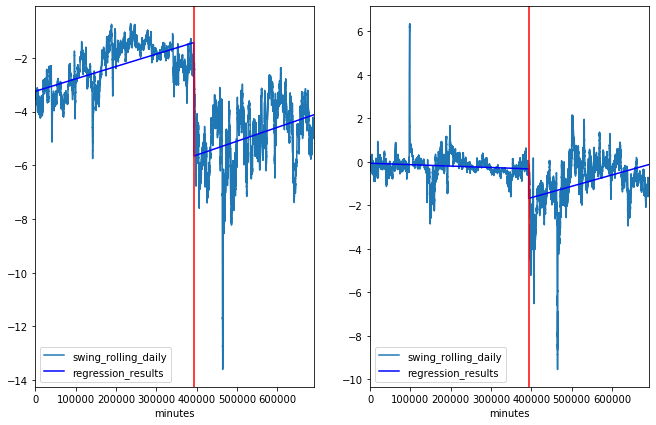

In [459]:
rcParams['figure.figsize'] = 11, 7
plt.subplot(1, 2, 1)
ax = plt.gca()
BF_BN['swing_rolling_daily'] = BF_BN['swingdiff'].rolling(window=1440).mean()
BF_BN.plot(kind='line',x='minutes',y='swing_rolling_daily', ax=ax)
BF_BN.plot(kind='line',x='minutes',y='regression_results', color='blue', ax=ax)
ax.axvline(x= int(x1.loc[x1['timestamp'] == event_time]['minutes']), c = 'red')

plt.subplot(1, 2, 2)
ax = plt.gca()
BF_BM['swing_rolling_daily'] = BF_BM['swingdiff'].rolling(window=1440).mean()
BF_BM.plot(kind='line',x='minutes',y='swing_rolling_daily', ax=ax)
BF_BM.plot(kind='line',x='minutes',y='regression_results', color='blue', ax=ax)
ax.axvline(x= int(x1.loc[x1['timestamp'] == event_time]['minutes']), c = 'red')


plt.show()

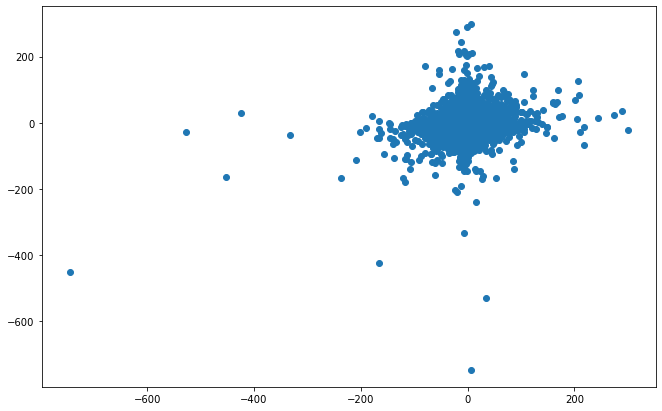

In [435]:
plt.figure()

x = BF_BN['swingdiff'][0:-1]
y1 = BF_BN['swingdiff'][1:]


plt.scatter(x,y1)

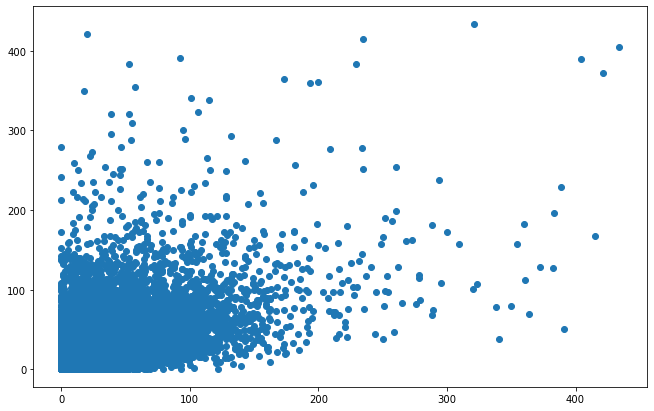

In [437]:
plt.figure()

x = BF_BN['swing'][0:-1]
y1 = BF_BN['swing'][1:]


plt.scatter(x,y1)

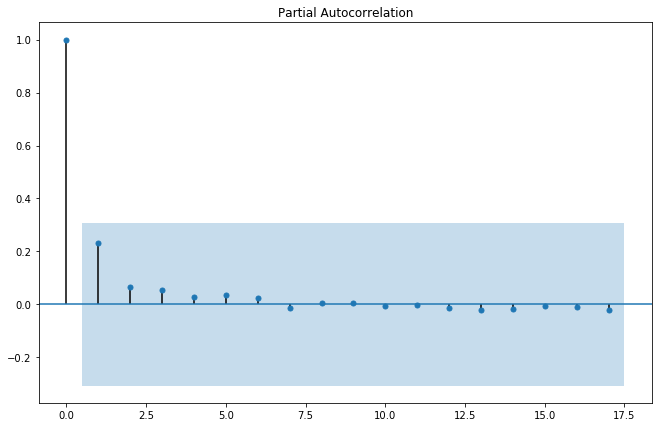

In [439]:
sm.graphics.tsa.plot_pacf(sm.graphics.tsa.pacf(BF_BN['swingdiff'], nlags=40))
plt.show()

In [442]:
BF_BN.after_event

min_elapsed
0         False
1         False
2         False
3         False
4         False
          ...  
691856     True
691857     True
691858     True
691859     True
691860     True
Name: after_event, Length: 674548, dtype: bool

In [446]:
BF_BN.swingdiff[BF_BN.after_event == 1]

min_elapsed
349921    -3.825735
349922    -6.471815
349923   -12.650000
349924    -8.600000
349925    -5.320000
            ...    
691856   -10.770000
691857    -7.700000
691858    -4.680000
691859    -5.480000
691860   -11.640000
Name: swingdiff, Length: 335227, dtype: float64

In [450]:
F = np.var(BF_BN.swingdiff[BF_BN.after_event == 1]) / np.var(BF_BN.swingdiff[BF_BN.after_event == 0])
print(F)
scipy.stats.bartlett(BF_BN.swingdiff[BF_BN.after_event == 1],BF_BN.swingdiff[BF_BN.after_event == 0])
scipy.stats.levene(BF_BN.swingdiff[BF_BN.after_event == 1],BF_BN.swingdiff[BF_BN.after_event == 0])

4.143022430884461


LeveneResult(statistic=39116.08318205862, pvalue=0.0)

In [300]:
mod = smf.ols(formula='swing ~ minutes + after_event + after_event * minutes', data=x2)
res = mod.fit()
x2['reg_results'] = res.params[0] + x2['after_event'] * res.params[1] + x2['minutes'] * res.params[2] + x2['after_event'] * x2['minutes'] * res.params[3]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  swing   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                 1.638e+04
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:51:12   Log-Likelihood:            -2.5905e+06
No. Observations:              691861   AIC:                         5.181e+06
Df Residuals:                  691857   BIC:                         5.181e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

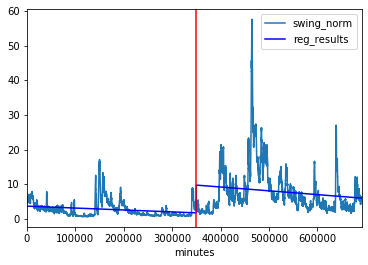

In [301]:
ax = plt.gca()
x2['swing_norm'] = x2['swing'].rolling(window=1440).mean()
x2.plot(kind='line',x='minutes',y='swing_norm', ax=ax)
x2.plot(kind='line',x='minutes',y='reg_results', color='blue', ax=ax)
ax.axvline(x= int(x2.loc[x2['timestamp'] == event_time]['minutes']), c = 'red')

plt.show()

In [ ]:
data = pd.read_csv('ETHBTC-1m-binance.csv')
x_train, x_test = train_test_split(data, test_size=0.2)


n_classes = 2
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(2, activation='softmax')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder.fit(x_train, y_train,
                epochs=50,
                batch_size=100,)
test_scores = autoencoder.evaluate(x_test, y_test, verbose=2)
print(test_scores[0])